# Stress Test Analysis 
date executed: 06.07.2025

Test Endpoints:

[1] Ollama Framework
[2] vLLM Framework

Primary Objective:
Determine which framework is better suited for production deployment by evaluating:
- Maximum concurrent request handling capacity
- Response time under varying load conditions
- Throughput performance (requests per second)
- Error rates and stability under stress
- Resource efficiency and scalability characteristics


In [1]:
DATA_PATH = '/home/lsnt/Repositories/LLMOps/Local/llm-stress-test/output/test_20250706_231913'

## Analysis

In [10]:

from notebooks.analysis_utils import (
    StressTestAnalyzer, 
    StressTestVisualizer, 
    StressTestReportGenerator,
    quick_analysis,
    create_all_visualizations
)
import matplotlib.pyplot as plt

In [3]:
analyzer, visualizer, report_gen = quick_analysis(DATA_PATH)

Loading results from: llm_stress_test_20250706_231913.csv


In [7]:
summary = analyzer.get_summary_stats()
print(f"✓ Summary stats for {len(summary)} frameworks")
for framework, stats in summary.items():
    print(f"  {framework.upper()}: Avg RPS={stats['max_rps']:.1f}, "
            f"Avg RT={stats['avg_response_time']:.1f}ms, "
            f"Success Rate={stats['avg_success_rate']:.1f}%")

✓ Summary stats for 2 frameworks
  OLLAMA: Avg RPS=1.6, Avg RT=7609.3ms, Success Rate=69.5%
  VLLM: Avg RPS=12.3, Avg RT=3333.1ms, Success Rate=100.0%


In [8]:
breaking_points = analyzer.find_breaking_points()
print(f"\n✓ Breaking points analysis:")
for framework, bp in breaking_points.items():
    print(f"  {framework.upper()}: Breaking point at {bp['breaking_point']} "
            f"concurrent requests (Peak RPS: {bp['peak_rps']:.1f})")



✓ Breaking points analysis:
  OLLAMA: Breaking point at 100 concurrent requests (Peak RPS: 1.6)
  VLLM: Breaking point at None concurrent requests (Peak RPS: 12.3)


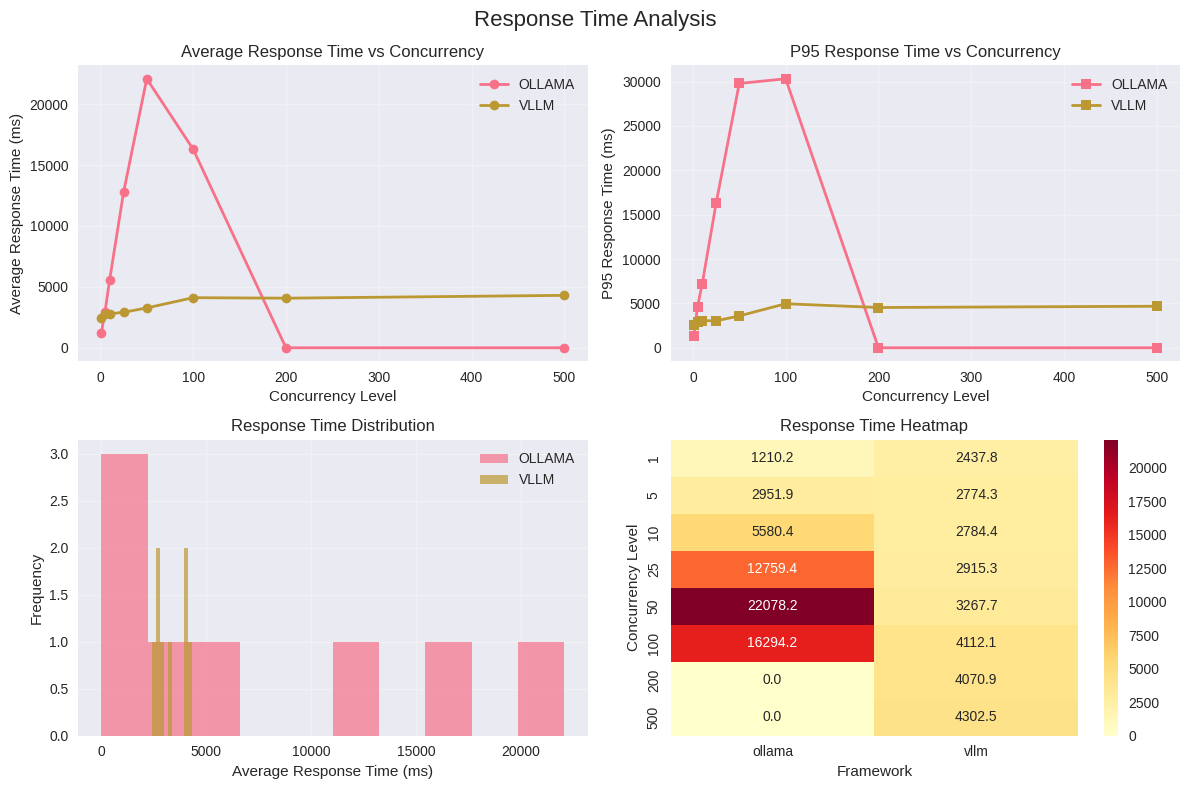

In [12]:
fig1 = visualizer.plot_response_time_comparison()
fig1.suptitle("Response Time Analysis", fontsize=16)
plt.show()

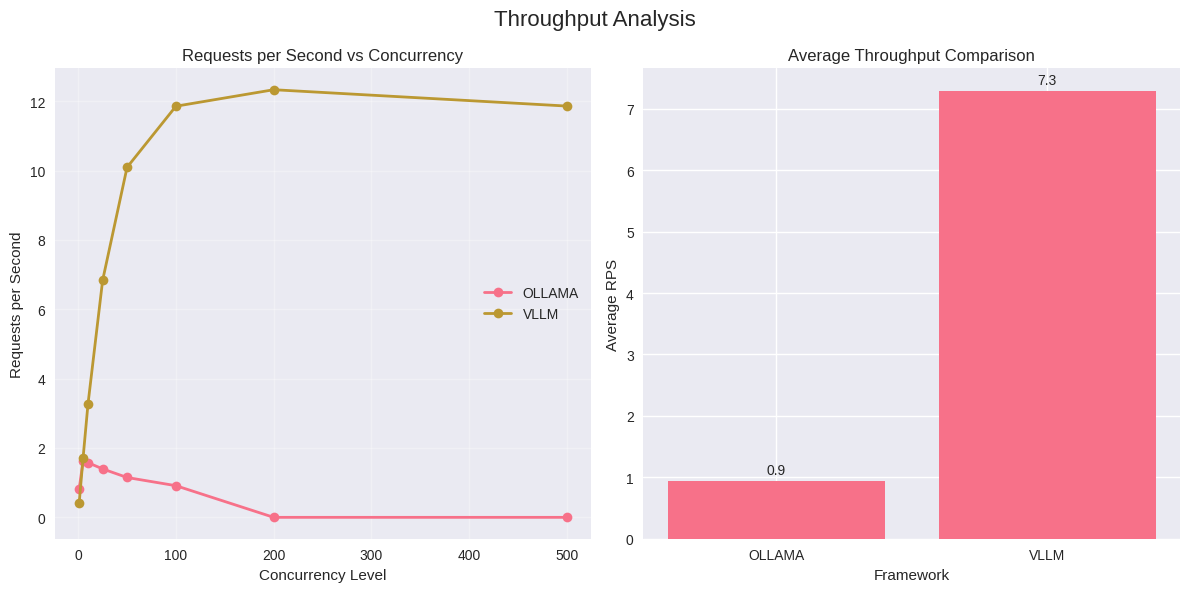

In [13]:
fig2 = visualizer.plot_throughput_analysis()
fig2.suptitle("Throughput Analysis", fontsize=16)
plt.show()

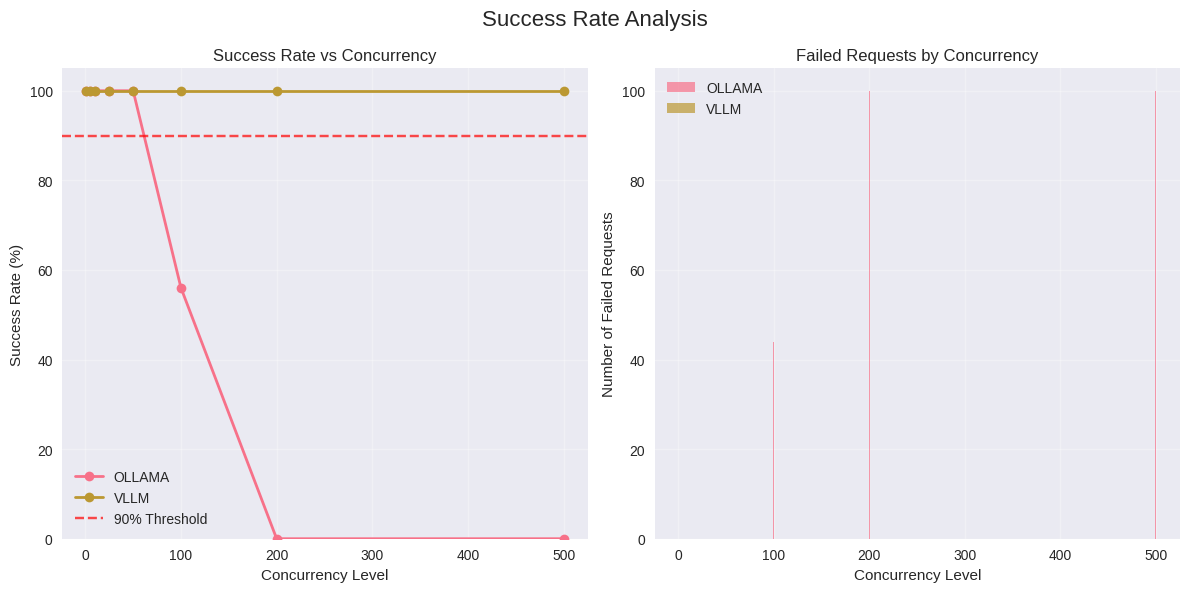

In [14]:
fig3 = visualizer.plot_success_rate_analysis()
fig3.suptitle("Success Rate Analysis", fontsize=16)
plt.show()

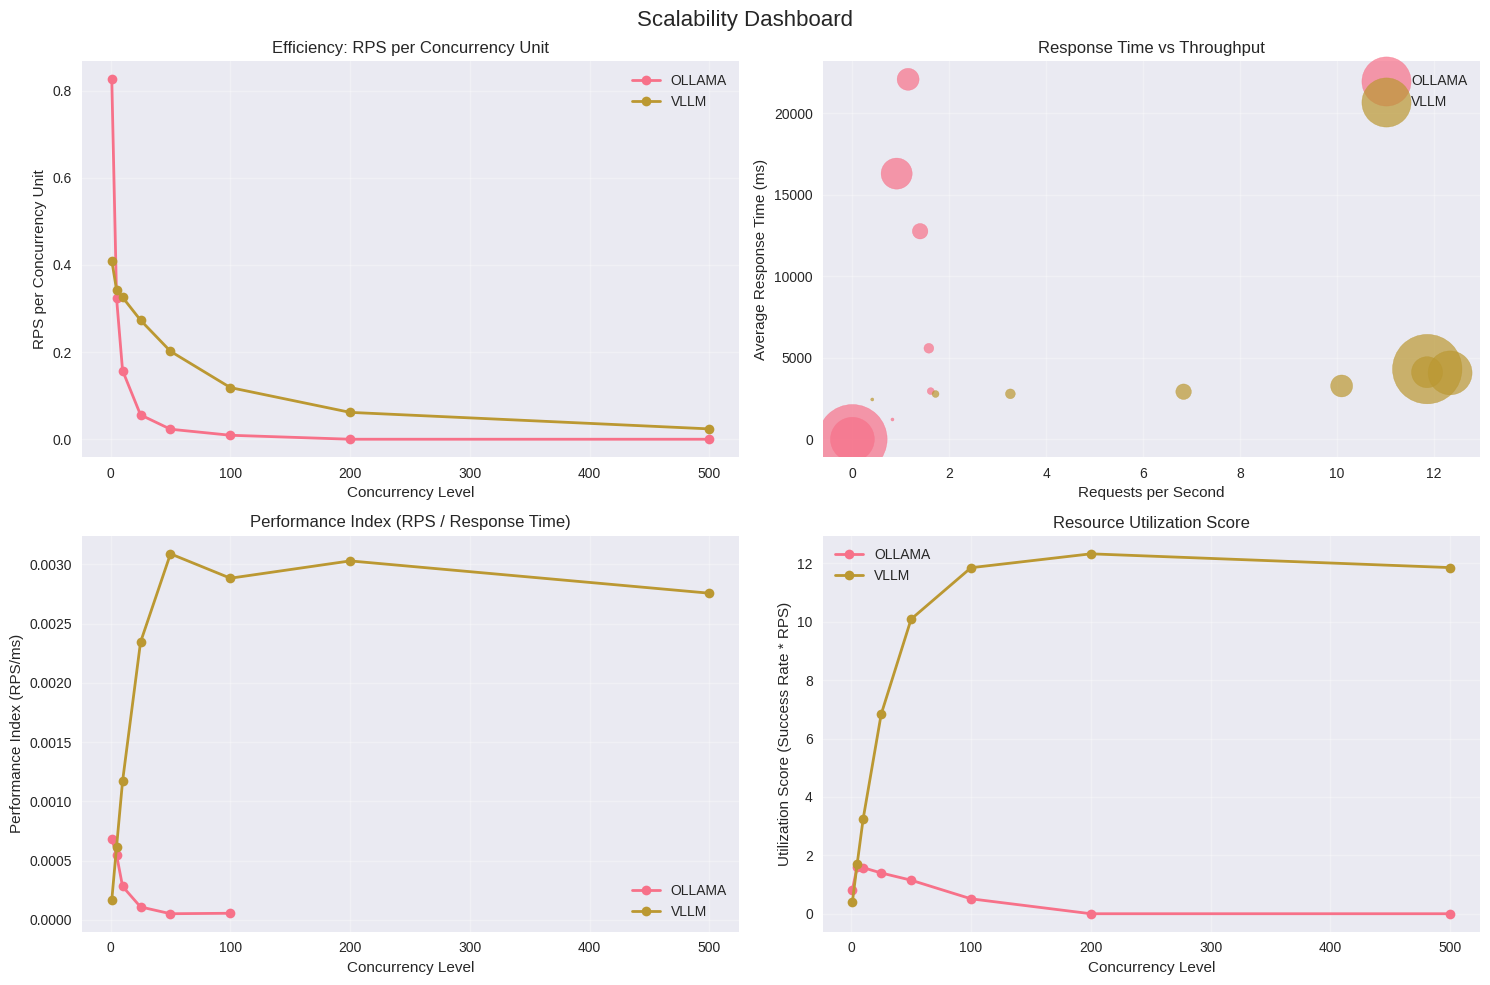

In [15]:
fig4 = visualizer.plot_scalability_curves()
fig4.suptitle("Scalability Dashboard", fontsize=16)
plt.show()

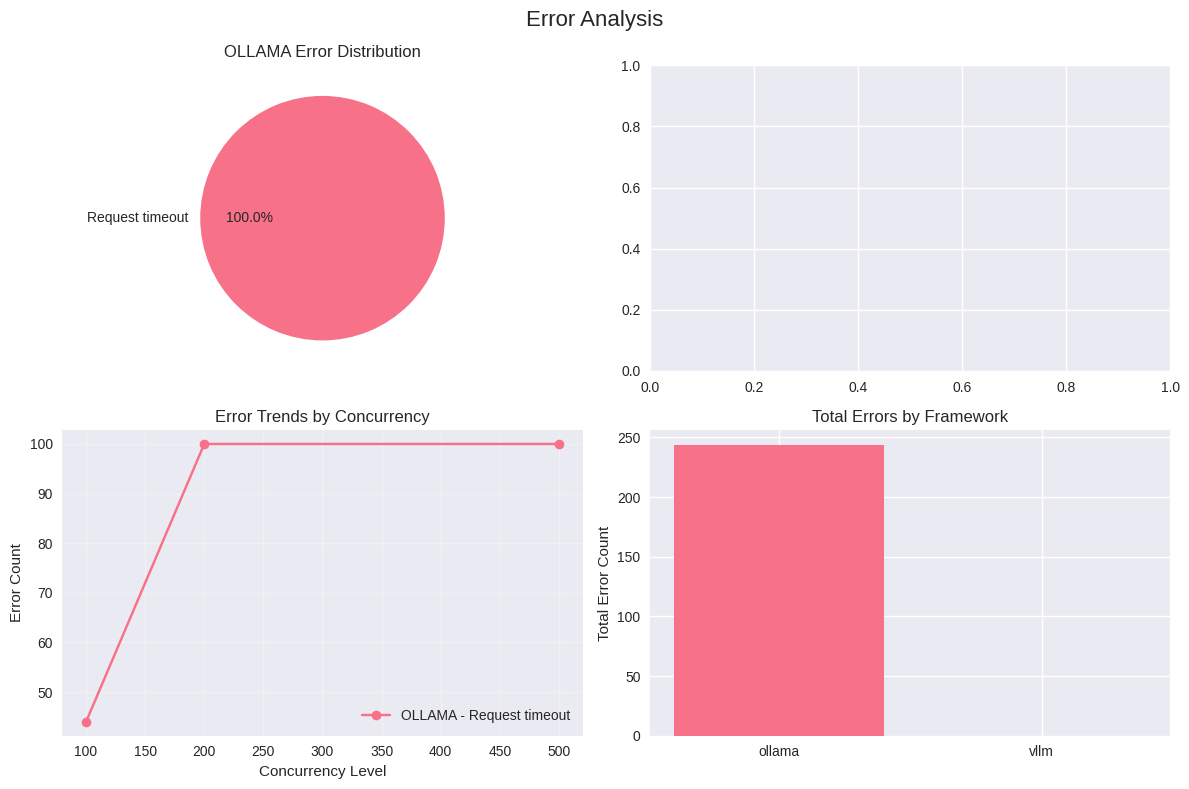

In [16]:
fig5 = visualizer.plot_error_analysis()
if fig5:
    fig5.suptitle("Error Analysis", fontsize=16)
    plt.show()
else:
    print("  No error data available for visualization")

In [22]:
exec_summary = report_gen.generate_executive_summary()
print(f"✓ Executive summary generated")
print(f"  Overall winner: {exec_summary['performance_comparison']['overall_winner'].upper()}")
print(f"  Recommendations: {len(exec_summary['recommendations'])} items")

insights = report_gen.generate_detailed_insights()
print(f"✓ Detailed insights for {len(insights)} frameworks")

report = report_gen.create_markdown_report("output/stress_test_report.md")
print(f"✓ Markdown report saved")



✓ Executive summary generated
  Overall winner: VLLM
  Recommendations: 2 items
✓ Detailed insights for 2 frameworks
Markdown report saved to: output/stress_test_report.md
✓ Markdown report saved
